# Week 2. Linear Algebra
## Task 1. Sentences comparison 

In [37]:
import re
text_file  = open (r'd:\проектик\Coursera\Coursera--Specialisation-\Math and Python\Week2\sentences.txt'.decode('utf-8'),'r' )
words = []
for row in text_file:
    words.append(re.findall('([a-z]+)', row.lower()))
print words[0]    

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']


In [83]:
import collections as cl
cnt = cl.Counter()
cnt_by_sentence = []
for sentence in words:
    for word in sentence:
        cnt[word] += 1
    cnt_by_sentence.append(cnt)
    cnt = cl.Counter()
print cnt_by_sentence[0]['the']        

1


In [86]:
heap = set()
for sentence in words:
    for word in sentence:
        heap.add(word)
dict_word = {} 
number = 0

for word in list(heap):
    dict_word[number] = word
    number += 1
print dict_word

{0: 'displays', 1: 'osx', 2: 'selection', 3: 'safari', 4: 'just', 5: 'developed', 6: 'over', 7: 'vermin', 8: 'domestic', 9: 'named', 10: 'installed', 11: 'symbols', 12: 'through', 13: 'human', 14: 'world', 15: 'disk', 16: 'its', 17: 'fifth', 18: 'features', 19: 'tamed', 20: 'upgrade', 21: 'lb', 22: 'drive', 23: 'to', 24: 'won', 25: 'deliberately', 26: 'marks', 27: 'has', 28: 'predecessor', 29: 'non', 30: 'which', 31: 'read', 32: 'october', 33: 'every', 34: 'os', 35: 'they', 36: 'not', 37: 'during', 38: 'now', 39: 'possess', 40: 'intel', 41: 'keyboards', 42: 'bytes', 43: 'unnecessary', 44: 'patch', 45: 'predators', 46: 'small', 47: 'output', 48: 'entirely', 49: 'where', 50: 'ears', 51: 'available', 52: 'on', 53: 'often', 54: 'sequence', 55: 'some', 56: 'lion', 57: 'frequency', 58: 'are', 59: 'year', 60: 'download', 61: 'terms', 62: 'concern', 63: 'error', 64: 'for', 65: 'pipes', 66: 'since', 67: 'factory', 68: 'artificial', 69: 'content', 70: 'version', 71: 'run', 72: 'between', 73: 'ne

In [89]:
import numpy as np
freq_words  = np.ones((len(words),len(dict_word)))

for row in range(len(words)):
    for column in range(len(dict_word)):
        if dict_word[column] in words[row]:
            freq_words[row, column] = cnt_by_sentence[row][dict_word[column]]
        else:
            freq_words[row, column] = 0
print freq_words

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]


In [99]:
import scipy as sp
dist = []
for row in freq_words:
    dist.append(sp.spatial.distance.cosine(freq_words[0], row))
print dist    



[0.0, 0.95275444087384664, 0.86447381456421235, 0.89517151632780823, 0.77708871496985887, 0.94023856953328033, 0.7327387580875756, 0.92587506833388988, 0.88427248752843102, 0.90550888174769317, 0.83281653622739416, 0.88047713906656067, 0.83964325485254543, 0.87035925528956715, 0.87401184233025764, 0.94427217874246472, 0.84063618542208085, 0.95664450152379399, 0.94427217874246472, 0.88854435748492944, 0.84275727449171223, 0.82503644694405864]


## Task2. Function approximation


In [108]:
%matplotlib inline
import matplotlib as mp

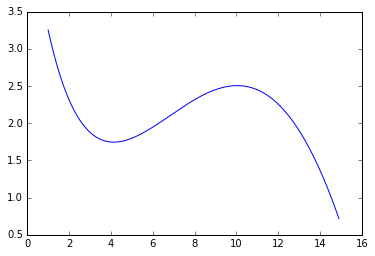

In [131]:
x = np.arange(1, 15, 0.1)
def func(x):
    return np.sin(x/5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
    
y = func(x)
mp.pyplot.plot(x, y)

1st level polynom


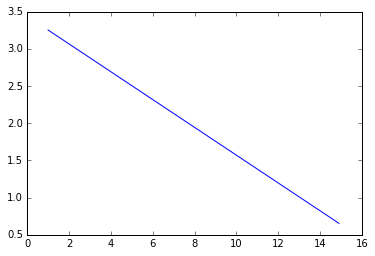

In [132]:
A = np.array([[1, 1],[1, 15]])
b = np.array([func(1.),func(15.)])
w0,w1 =  scipy.linalg.solve(A,b)
y = w0 +w1*x
mp.pyplot.plot(x, y)

2nd level polynom

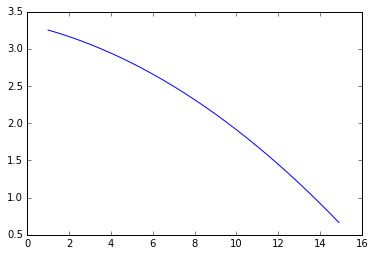

In [133]:
A = np.array([[1, 1,1],[1, 8, 64],[1, 15, 225]])
b = np.array([func(1.),func(8.),func(15.)])
w0,w1,w2 =  scipy.linalg.solve(A,b)
y = w0 +w1*x+ w2*x**2
mp.pyplot.plot(x, y)

3rd level polynom

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332


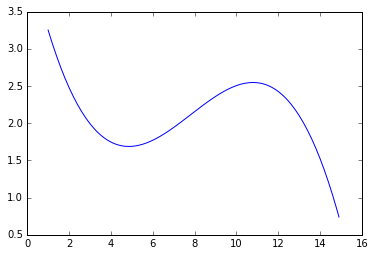

In [130]:
A = np.array([[1, 1,1,1],[1, 4, 16, 64],[1, 10, 100, 1000], [1, 15, 225, 3375]])
b = np.array([np.sin(1./5)*np.exp(1./10)+5*np.exp(-1./2),np.sin(4./5)*np.exp(4./10)+5*np.exp(-4./2),np.sin(10./5)*np.exp(10./10)+5*np.exp(-10./2),
            np.sin(15./5)*np.exp(15./10)+5*np.exp(-15./2)])
w0,w1,w2, w3 =  scipy.linalg.solve(A,b)
y = w0 +w1*x+ w2*x**2 +w3*x**3
mp.pyplot.plot(x, y)
print w0, w1, w2, w3

In [129]:
225*15
4**3


64